In [64]:
import pandas as pd
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas
import matplotlib.pyplot as plt
import networkx as nx

# Constants
DATA_FOLDER = "data/"
FRAMINGHAM = {"name": "framingham.csv",
              "numeric_columns": ["age", "education", "cigsPerDay", "BPMeds", "totChol", "sysBP", "diaBP", "heartRate", "glucose"]
              }
FINANCIAL = {"name": "financial-risk.csv",
             "numeric_columns": ["Age", "Income", "Credit Score", "Loan Amount", "Years at Current Job", "Debt-to-Income Ratio", "Assets Value"]
             }

WORKING_DATASET = FINANCIAL

df = pd.read_csv(DATA_FOLDER + WORKING_DATASET["name"])

print(df.shape)
# print(df.head())

df = df[WORKING_DATASET["numeric_columns"]]
df.dropna(inplace=True)

# Verify that there are no missing values
print("Total amount of missing values:", df.isnull().sum().sum())
print("New shape:", df.shape)

(15000, 20)
Total amount of missing values: 0
New shape: (7839, 7)


In [65]:
sm = from_pandas(df, w_threshold=0.1)

c:\Users\t-yzelinger\AppData\Local\anaconda3\envs\resmet_venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [66]:
sm.edges

OutEdgeView([('Age', 'Income'), ('Age', 'Loan Amount'), ('Age', 'Assets Value'), ('Credit Score', 'Income'), ('Credit Score', 'Loan Amount'), ('Credit Score', 'Assets Value'), ('Loan Amount', 'Assets Value'), ('Years at Current Job', 'Income'), ('Years at Current Job', 'Loan Amount'), ('Years at Current Job', 'Assets Value'), ('Debt-to-Income Ratio', 'Assets Value')])

In [67]:
bn = BayesianNetwork(sm)

In [68]:
bn.edges

[('Age', 'Income'),
 ('Age', 'Loan Amount'),
 ('Age', 'Assets Value'),
 ('Loan Amount', 'Assets Value'),
 ('Credit Score', 'Income'),
 ('Credit Score', 'Loan Amount'),
 ('Credit Score', 'Assets Value'),
 ('Years at Current Job', 'Income'),
 ('Years at Current Job', 'Loan Amount'),
 ('Years at Current Job', 'Assets Value'),
 ('Debt-to-Income Ratio', 'Assets Value')]

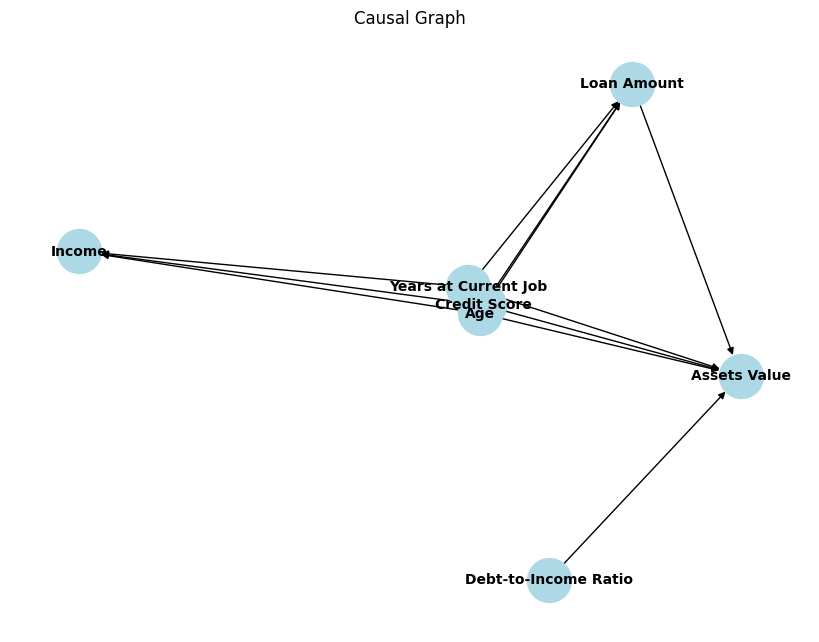

In [69]:
plt.figure(figsize=[8, 6])
pos = nx.spring_layout(sm)
nx.draw(sm, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Causal Graph")
plt.show()

In [70]:
graph = nx.DiGraph(bn.edges)
nx.is_directed_acyclic_graph(graph)

True

In [71]:
inverse_dependencies = {independent: [] for independent in df.columns}
for dependent, independent in bn.edges:
    inverse_dependencies[independent].append(dependent)

In [72]:
inverse_dependencies

{'Age': [],
 'Income': ['Age', 'Credit Score', 'Years at Current Job'],
 'Credit Score': [],
 'Loan Amount': ['Age', 'Credit Score', 'Years at Current Job'],
 'Years at Current Job': [],
 'Debt-to-Income Ratio': [],
 'Assets Value': ['Age',
  'Loan Amount',
  'Credit Score',
  'Years at Current Job',
  'Debt-to-Income Ratio']}

In [73]:
columns_indices = {column: index for index, column in enumerate(df.columns)}
indices_dependencies = {columns_indices[independent]: [columns_indices[dependent] for dependent in dependents] for independent, dependents in inverse_dependencies.items()}

In [74]:
indices_dependencies

{0: [], 1: [0, 2, 4], 2: [], 3: [0, 2, 4], 4: [], 5: [], 6: [0, 3, 2, 4, 5]}